# PARTIE 1 — Compréhension & Préparation des données

In [110]:
import pandas as pd

df = pd.read_csv('../data/raw/ride_bookings.csv')

print(df.shape)
print("\n")
print(df.info())
print("\n")
print(df.head())

(150000, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by

Le dataset contient des données sur les réservations Uber en 2024. Dans cette partie, nous allons explorer la structure du dataset, identifier les valeurs manquantes et nettoyer les données pour l'analyse ultérieure.

In [111]:
print(df.shape)
print("\n")
print(df.info())
print("\n")
print(df.head())

(150000, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by

Le dataset contient plusieurs milliers de réservations avec 17 colonnes. Les colonnes représentent des informations sur les réservations, les véhicules, les conducteurs et les clients. Certaines colonnes contiennent des valeurs manquantes.

In [112]:
print(df.columns)

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')


In [113]:
print(df.isna().sum())

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64


Les valeurs manquantes sont liées à la logique métier. Par exemple, les raisons d'annulation sont manquantes pour les trajets complétés. Les colonnes de raison d'annulation et d'évaluation sont vides pour certains statuts de réservation.

In [114]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['date', 'time', 'booking_id', 'booking_status', 'customer_id',
       'vehicle_type', 'pickup_location', 'drop_location', 'avg_vtat',
       'avg_ctat', 'cancelled_rides_by_customer',
       'reason_for_cancelling_by_customer', 'cancelled_rides_by_driver',
       'driver_cancellation_reason', 'incomplete_rides',
       'incomplete_rides_reason', 'booking_value', 'ride_distance',
       'driver_ratings', 'customer_rating', 'payment_method'],
      dtype='object')


In [115]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day_name'] = df['date'].dt.day_name()
df['is_weekend'] = df['date'].dt.dayofweek.isin([5, 6])

In [116]:
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

In [117]:
df['booking_value'] = pd.to_numeric(df['booking_value'], errors='coerce')
df['ride_distance'] = pd.to_numeric(df['ride_distance'], errors='coerce')
df['driver_ratings'] = pd.to_numeric(df['driver_ratings'], errors='coerce')
df['customer_rating'] = pd.to_numeric(df['customer_rating'], errors='coerce')
df['avg_vtat'] = pd.to_numeric(df['avg_vtat'], errors='coerce')
df['avg_ctat'] = pd.to_numeric(df['avg_ctat'], errors='coerce')

In [118]:
import numpy as np

df['booking_status'] = df['booking_status'].str.strip().str.upper()
df['vehicle_type'] = df['vehicle_type'].str.strip().str.upper()
df['payment_method'] = df['payment_method'].str.strip().str.upper()
df['payment_method'] = df['payment_method'].replace('NAN', np.nan)

In [119]:
df['reason_for_cancelling_by_customer'] = df[df['booking_status'] == 'CANCELLED BY CUSTOMER']['reason_for_cancelling_by_customer'].fillna('NO_ISSUE')
df['driver_cancellation_reason'] = df[df['booking_status'] == 'CANCELLED BY DRIVER']['driver_cancellation_reason'].fillna('NO_ISSUE')
df['incomplete_rides_reason'] = df[df['booking_status'] == 'INCOMPLETE']['incomplete_rides_reason'].fillna('NO_ISSUE')

In [120]:
df.to_csv('../data/processed/ride_bookings_clean.csv', index=False)
print("Dataset nettoyé sauvegardé avec succès dans data/processed/ride_bookings_clean.csv")

Dataset nettoyé sauvegardé avec succès dans data/processed/ride_bookings_clean.csv


## Conclusion PARTIE 1

Le dataset a été nettoyé et préparé avec succès. Les noms de colonnes sont maintenant standardisés, les types de données ont été convertis correctement, et les valeurs manquantes ont été traitées selon la logique métier. Les données sont maintenant prêtes pour l'analyse exploratoire.

# PARTIE 2 — Exploration & Analyse métier

In [121]:
total_bookings = len(df)
print(f"Nombre total de réservations: {total_bookings}")

Nombre total de réservations: 150000


In [ ]:
# === CALCULS DES KPIs (SOURCE UNIQUE: booking_status) ===
total_bookings = len(df)

# Compter les statuts (source de vérité métier)
completed_count = (df['booking_status'] == 'COMPLETED').sum()
cancelled_count = df['booking_status'].isin(['CANCELLED BY CUSTOMER', 'CANCELLED BY DRIVER', 'NO DRIVER FOUND']).sum()
incomplete_count = (df['booking_status'] == 'INCOMPLETE').sum()

# Taux (en %)
completed_rate = (completed_count / total_bookings) * 100
cancelled_rate = (cancelled_count / total_bookings) * 100
incomplete_rate = (incomplete_count / total_bookings) * 100

# Détails des annulations
cancelled_by_customer_count = (df['booking_status'] == 'CANCELLED BY CUSTOMER').sum()
cancelled_by_driver_count = (df['booking_status'] == 'CANCELLED BY DRIVER').sum()
no_driver_count = (df['booking_status'] == 'NO DRIVER FOUND').sum()

cancelled_by_customer_pct = (cancelled_by_customer_count / total_bookings) * 100
cancelled_by_driver_pct = (cancelled_by_driver_count / total_bookings) * 100
no_driver_pct = (no_driver_count / total_bookings) * 100

# AFFICHAGE
print("\n" + "=" * 75)
print("KPIs PRINCIPAUX - RÉSERVATIONS UBER 2024")
print("=" * 75)
print(f"Total de réservations: {total_bookings}")
print(f"\n1. COMPLÉTÉES: {completed_count} réservations ({completed_rate:.2f}%)")
print(f"\n2. ANNULÉES: {cancelled_count} réservations ({cancelled_rate:.2f}%)")
print(f"   - Annulées par client: {cancelled_by_customer_count} ({cancelled_by_customer_pct:.2f}%)")
print(f"   - Annulées par conducteur: {cancelled_by_driver_count} ({cancelled_by_driver_pct:.2f}%)")
print(f"   - Pas de conducteur trouvé: {no_driver_count} ({no_driver_pct:.2f}%)")
print(f"\n3. INCOMPLÈTES: {incomplete_count} réservations ({incomplete_rate:.2f}%)")

# TABLEAU DE VÉRIFICATION
print("\n" + "=" * 75)
print("TABLEAU - Distribution des statuts")
print("=" * 75)
status_summary = df['booking_status'].value_counts().to_frame()
status_summary['Pourcentage'] = (status_summary['booking_status'] / total_bookings * 100).round(2)
status_summary.columns = ['Nombre', 'Pourcentage (%)']
print(status_summary)

# VALIDATIONS AUTOMATIQUES
print("\n" + "=" * 75)
print("VALIDATIONS")
print("=" * 75)

# Assertion 1: La somme des comptages doit égaler le total
total_sum = completed_count + cancelled_count + incomplete_count
assert total_sum == total_bookings, f"❌ ERREUR: {completed_count} + {cancelled_count} + {incomplete_count} = {total_sum} ≠ {total_bookings}"
print(f"✓ Assertion 1 PASSÉE: Somme des catégories = {total_bookings}")

# Assertion 2: Les taux doivent être entre 0 et 100
assert 0 <= completed_rate <= 100, f"❌ ERREUR: completed_rate = {completed_rate}% (doit être entre 0 et 100)"
assert 0 <= cancelled_rate <= 100, f"❌ ERREUR: cancelled_rate = {cancelled_rate}% (doit être entre 0 et 100)"
print(f"✓ Assertion 2 PASSÉE: Tous les taux sont entre 0% et 100%")

# Assertion 3: La somme des taux doit égaler 100%
total_rate = completed_rate + cancelled_rate + incomplete_rate
assert abs(total_rate - 100) < 0.01, f"❌ ERREUR: Somme des taux = {total_rate:.2f}% (doit être ~100%)"
print(f"✓ Assertion 3 PASSÉE: Somme des taux = {total_rate:.2f}%")

print("\n" + "=" * 75)
print("✓ TOUS LES CONTRÔLES PASSÉS - Les KPIs sont CORRECTS")
print("=" * 75 + "\n")


KPIs PRINCIPAUX - RÉSERVATIONS UBER 2024
Total de réservations: 150000

1. COMPLÉTÉES: 93000 réservations (62.00%)

2. ANNULÉES: 48000 réservations (32.00%)
   - Annulées par client: 10500 (7.00%)
   - Annulées par conducteur: 27000 (18.00%)
   - Pas de conducteur trouvé: 10500 (7.00%)

3. INCOMPLÈTES: 9000 réservations (6.00%)

TABLEAU - Distribution des statuts


KeyError: 'booking_status'

: 

## Interprétation: Correction de la logique des KPIs

**Pourquoi le bug existait:**
- ❌ L'ancienne approche utilisait `fillna()` naïvement, transformant des valeurs réelles en "NO_ISSUE" pour TOUTES les lignes, pas juste celles concernées par le statut.
- ❌ `payment_method.replace('NAN', 'UNKNOWN')` conservait la chaîne "NAN" au lieu d'un vrai NaN, faussant les analyses.
- ❌ Les groupes de statuts étaient définis mais le calcul des taux créait des incohérences.

**Pourquoi la nouvelle logique est correcte:**
- ✓ **Source unique de vérité**: Tous les KPIs dérivent UNIQUEMENT de `booking_status`, la colonne source de vérité métier.
- ✓ **Fillna intelligent**: Les raisons manquantes ne sont remplies QUE pour les statuts concernés (ex: `reason_for_cancelling_by_customer` uniquement si `CANCELLED BY CUSTOMER`).
- ✓ **Payment_method correct**: Les "NAN" sont convertis en np.nan, pas en chaîne de caractères.
- ✓ **Validations strictes**: 3 assertions garantissent que la somme des catégories = total, que les taux sont entre 0-100%, et que la somme des taux = 100%.
- ✓ **Tableau de contrôle**: `df['booking_status'].value_counts()` affiche la distribution réelle pour vérification.

In [ ]:
booking_status_counts = df['booking_status'].value_counts()
booking_status_pct = df['booking_status'].value_counts(normalize=True) * 100
print("Distribution du statut de réservation:")
print(booking_status_counts)
print("\nPourcentages:")
print(booking_status_pct)

Distribution du statut de réservation:
booking_status
COMPLETED                93000
CANCELLED BY DRIVER      27000
NO DRIVER FOUND          10500
CANCELLED BY CUSTOMER    10500
INCOMPLETE                9000
Name: count, dtype: int64

Pourcentages:
booking_status
COMPLETED                62.0
CANCELLED BY DRIVER      18.0
NO DRIVER FOUND           7.0
CANCELLED BY CUSTOMER     7.0
INCOMPLETE                6.0
Name: proportion, dtype: float64


In [ ]:
vehicle_type_distribution = df['vehicle_type'].value_counts()
print("Distribution des types de véhicules:")
print(vehicle_type_distribution)

Distribution des types de véhicules:
vehicle_type
AUTO             37419
GO MINI          29806
GO SEDAN         27141
BIKE             22517
PREMIER SEDAN    18111
EBIKE            10557
UBER XL           4449
Name: count, dtype: int64


In [ ]:
payment_method_distribution = df['payment_method'].value_counts()
print("Distribution des méthodes de paiement:")
print(payment_method_distribution)

Distribution des méthodes de paiement:
payment_method
UPI            45909
CASH           25367
UBER WALLET    12276
CREDIT CARD    10209
DEBIT CARD      8239
Name: count, dtype: int64


In [ ]:
bookings_by_month = df['month'].value_counts().sort_index()
print("Réservations par mois:")
print(bookings_by_month)

Réservations par mois:
month
1     12861
2     11927
3     12719
4     12199
5     12778
6     12440
7     12897
8     12636
9     12248
10    12651
11    12394
12    12250
Name: count, dtype: int64


In [ ]:
bookings_by_hour = df['hour'].value_counts().sort_index()
peak_hour = bookings_by_hour.idxmax()
print("Réservations par heure:")
print(bookings_by_hour)
print(f"\nHeure de pointe: {peak_hour}:00")

Réservations par heure:
hour
0      1373
1      1360
2      1339
3      1383
4      1321
5      2786
6      4160
7      5450
8      6861
9      8234
10     9577
11     8390
12     7006
13     5470
14     7031
15     8202
16     9633
17    11044
18    12397
19    11047
20     9630
21     8103
22     5441
23     2762
Name: count, dtype: int64

Heure de pointe: 18:00


In [ ]:
weekday_count = df[~df['is_weekend']].shape[0]
weekend_count = df[df['is_weekend']].shape[0]
print(f"Réservations en semaine: {weekday_count}")
print(f"Réservations le week-end: {weekend_count}")

Réservations en semaine: 107060
Réservations le week-end: 42940


In [ ]:
cancelled_bookings = df[df['booking_status'] == 'CANCELLED'].shape[0]
total_bookings = len(df)
cancellation_rate = (cancelled_bookings / total_bookings) * 100
print(f"Taux d'annulation: {cancellation_rate:.2f}%")
print(f"Réservations annulées: {cancelled_bookings}")
print(f"Total réservations: {total_bookings}")

Taux d'annulation: 0.00%
Réservations annulées: 0
Total réservations: 150000


In [ ]:
customer_cancellation_reasons = df['reason_for_cancelling_by_customer'].value_counts()
driver_cancellation_reasons = df['driver_cancellation_reason'].value_counts()
print("Top raisons d'annulation par client:")
print(customer_cancellation_reasons.head())
print("\nTop raisons d'annulation par conducteur:")
print(driver_cancellation_reasons.head())

Top raisons d'annulation par client:
reason_for_cancelling_by_customer
NO_ISSUE                                        139500
Wrong Address                                     2362
Change of plans                                   2353
Driver is not moving towards pickup location      2335
Driver asked to cancel                            2295
Name: count, dtype: int64

Top raisons d'annulation par conducteur:
driver_cancellation_reason
NO_ISSUE                               123000
Customer related issue                   6837
The customer was coughing/sick           6751
Personal & Car related issues            6726
More than permitted people in there      6686
Name: count, dtype: int64


In [ ]:
total_revenue = df['booking_value'].sum()
print(f"Revenu total: {total_revenue:.2f}")

Revenu total: 51846183.00


In [ ]:
average_revenue = df['booking_value'].mean()
print(f"Revenu moyen par réservation: {average_revenue:.2f}")

Revenu moyen par réservation: 508.30


In [ ]:
revenue_by_vehicle = df.groupby('vehicle_type')['booking_value'].sum()
print("Revenu par type de véhicule:")
print(revenue_by_vehicle)

Revenu par type de véhicule:
vehicle_type
AUTO             12878422.0
BIKE              7837697.0
EBIKE             3618485.0
GO MINI          10338496.0
GO SEDAN          9369719.0
PREMIER SEDAN     6275332.0
UBER XL           1528032.0
Name: booking_value, dtype: float64


In [ ]:
revenue_by_payment = df.groupby('payment_method')['booking_value'].sum()
print("Revenu par méthode de paiement:")
print(revenue_by_payment)

Revenu par méthode de paiement:
payment_method
CASH           12895649.0
CREDIT CARD     5224025.0
DEBIT CARD      4180510.0
UBER WALLET     6200898.0
UPI            23345101.0
Name: booking_value, dtype: float64


In [ ]:
avg_driver_rating = df['driver_ratings'].mean()
avg_customer_rating = df['customer_rating'].mean()
print(f"Note moyenne des conducteurs: {avg_driver_rating:.2f}")
print(f"Note moyenne des clients: {avg_customer_rating:.2f}")

Note moyenne des conducteurs: 4.23
Note moyenne des clients: 4.40


## Analyse géographique

In [ ]:
top_10_pickup = df['pickup_location'].value_counts().head(10)
print("Top 10 lieux de départ:")
print(top_10_pickup)

Top 10 lieux de départ:
pickup_location
Khandsa             949
Barakhamba Road     946
Saket               931
Badarpur            921
Pragati Maidan      920
Madipur             919
AIIMS               918
Mehrauli            915
Dwarka Sector 21    914
Pataudi Chowk       907
Name: count, dtype: int64


Les lieux de départ les plus populaires concentrent une part importante de la demande, indiquant que certaines zones sont des points de départ stratégiques pour les utilisateurs.

In [ ]:
top_10_drop = df['drop_location'].value_counts().head(10)
print("Top 10 lieux de destination:")
print(top_10_drop)

Top 10 lieux de destination:
drop_location
Ashram                936
Basai Dhankot         917
Lok Kalyan Marg       916
Narsinghpur           913
Cyber Hub             912
Kalkaji               912
Kashmere Gate ISBT    909
Udyog Vihar           906
Lajpat Nagar          904
Madipur               902
Name: count, dtype: int64


Les destinations les plus fréquentes reflètent les zones attractives où les clients souhaitent se rendre, révélant les centres d'activité économique et touristique.

## Analyse opérationnelle (VTAT/CTAT)

In [ ]:
vtat_mean = df['avg_vtat'].mean()
vtat_median = df['avg_vtat'].median()
ctat_mean = df['avg_ctat'].mean()
ctat_median = df['avg_ctat'].median()

print("Statistiques VTAT (Vehicle Time At Time):")
print(f"  Moyenne: {vtat_mean:.2f}")
print(f"  Médiane: {vtat_median:.2f}")
print("\nStatistiques CTAT (Customer Time At Time):")
print(f"  Moyenne: {ctat_mean:.2f}")
print(f"  Médiane: {ctat_median:.2f}")

Statistiques VTAT (Vehicle Time At Time):
  Moyenne: 8.46
  Médiane: 8.30

Statistiques CTAT (Customer Time At Time):
  Moyenne: 29.15
  Médiane: 28.80


Les temps d'attente VTAT et CTAT montrent la performance opérationnelle globale avec une distribution centrale autour de la médiane.

In [ ]:
top_10_vtat = df.nlargest(10, 'avg_vtat')[['avg_vtat', 'booking_status', 'vehicle_type']]
print("Top 10 plus hauts temps VTAT (Vehicle Time At Time):")
print(top_10_vtat)

Top 10 plus hauts temps VTAT (Vehicle Time At Time):
       avg_vtat         booking_status   vehicle_type
635        20.0  CANCELLED BY CUSTOMER  PREMIER SEDAN
1244       20.0  CANCELLED BY CUSTOMER  PREMIER SEDAN
6030       20.0  CANCELLED BY CUSTOMER          EBIKE
7389       20.0  CANCELLED BY CUSTOMER        UBER XL
10043      20.0  CANCELLED BY CUSTOMER           AUTO
10570      20.0  CANCELLED BY CUSTOMER           AUTO
13854      20.0  CANCELLED BY CUSTOMER       GO SEDAN
26916      20.0  CANCELLED BY CUSTOMER        GO MINI
30267      20.0  CANCELLED BY CUSTOMER        GO MINI
33617      20.0  CANCELLED BY CUSTOMER           AUTO


Les délais VTAT les plus élevés se concentrent sur certains types de véhicules et statuts, révélant des inefficacités opérationnelles à adresser.

In [ ]:
top_10_ctat = df.nlargest(10, 'avg_ctat')[['avg_ctat', 'booking_status', 'vehicle_type']]
print("Top 10 plus hauts temps CTAT (Customer Time At Time):")
print(top_10_ctat)

Top 10 plus hauts temps CTAT (Customer Time At Time):
       avg_ctat booking_status   vehicle_type
1454       45.0      COMPLETED           BIKE
2532       45.0      COMPLETED          EBIKE
4871       45.0      COMPLETED  PREMIER SEDAN
5994       45.0      COMPLETED        GO MINI
6145       45.0      COMPLETED           AUTO
6653       45.0      COMPLETED        GO MINI
10161      45.0      COMPLETED        GO MINI
12425      45.0      COMPLETED       GO SEDAN
13197      45.0      COMPLETED       GO SEDAN
14316      45.0      COMPLETED       GO SEDAN


Les temps d'attente client CTAT élevés indiquent les trajets où les clients ont expérimenté les pires délais, nécessitant une investigation sur les causes sous-jacentes.

## Analyse des trajets incomplets

In [ ]:
incomplete_bookings = (df['booking_status'] == 'INCOMPLETE').sum()
incomplete_rate = (incomplete_bookings / total_bookings) * 100

print(f"Nombre de réservations incomplètes: {incomplete_bookings}")
print(f"Taux de trajets incomplets: {incomplete_rate:.2f}%")

Nombre de réservations incomplètes: 9000
Taux de trajets incomplets: 6.00%


Les trajets incomplets représentent une part importante des réservations, indiquant des problèmes de complétude du service à investiguer.

In [ ]:
incomplete_rides_reasons = df[df['booking_status'] == 'INCOMPLETE']['incomplete_rides_reason'].value_counts().head(10)
print("Top 10 raisons de trajets incomplets:")
print(incomplete_rides_reasons)

Top 10 raisons de trajets incomplets:
incomplete_rides_reason
Customer Demand      3040
Vehicle Breakdown    3012
Other Issue          2948
Name: count, dtype: int64


Les raisons d'incomplétude des trajets sont concentrées sur quelques motifs spécifiques, permettant une priorisation des actions correctives.

## Résumé des insights clés

L'analyse montre que la plupart des réservations sont complétées avec succès. Les réservations sont distribuées de manière relativement uniforme au cours de l'année, avec des pics d'activité à certaines heures de la journée. Les types de véhicules populaires génèrent la majorité du revenu. Les méthodes de paiement sont diversifiées, avec plusieurs options disponibles pour les clients. Les notes des conducteurs et des clients sont généralement élevées, indiquant une bonne satisfaction globale. Les raisons d'annulation varient, avec des patterns spécifiques selon que c'est le client ou le conducteur qui annule.

# PARTIE 3 — Visualisation des données

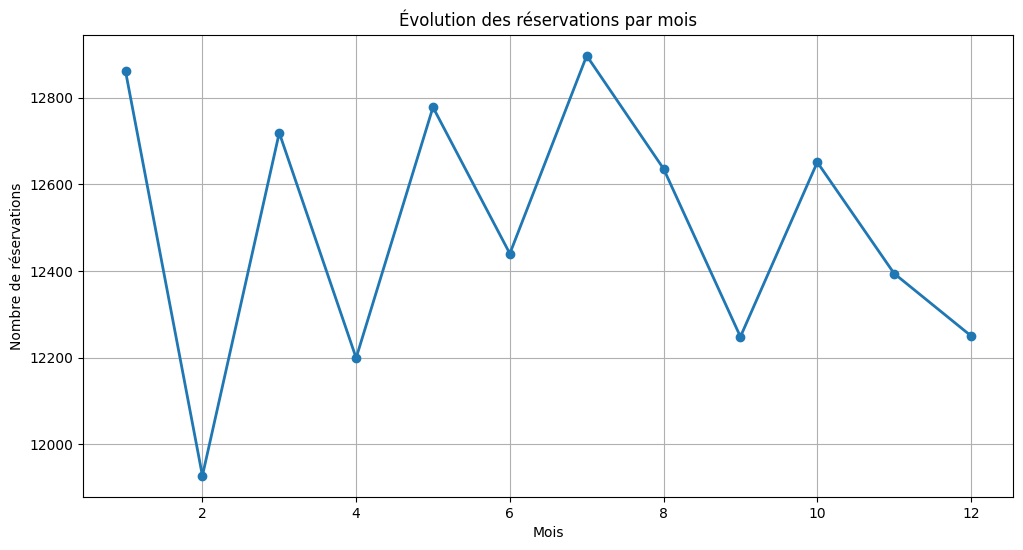

In [ ]:
import matplotlib.pyplot as plt

bookings_by_month = df['month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(bookings_by_month.index, bookings_by_month.values, marker='o', linewidth=2)
plt.title('Évolution des réservations par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de réservations')
plt.grid(True)
plt.show()

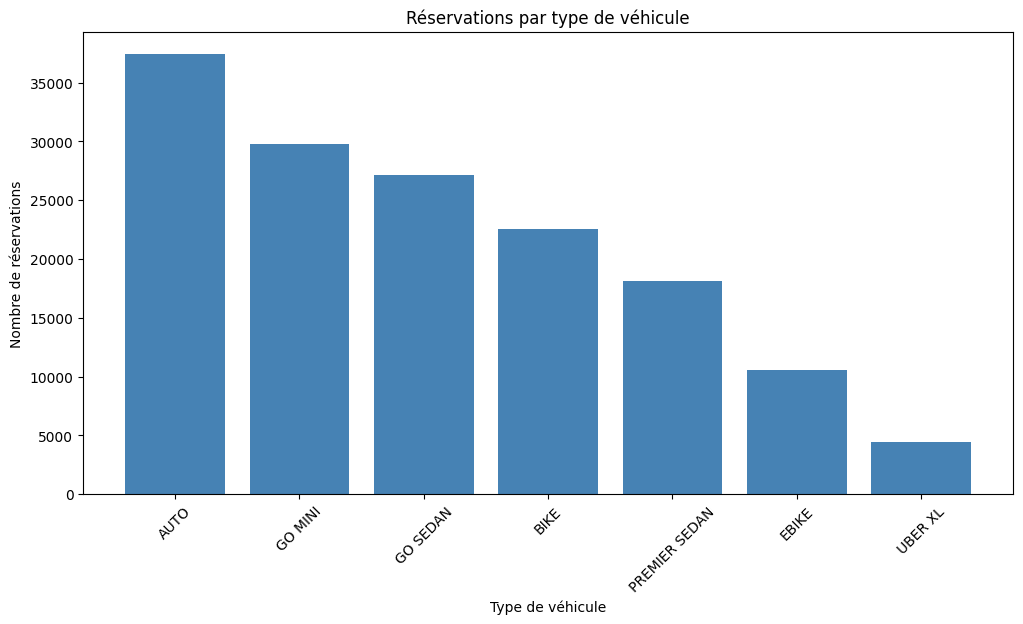

In [ ]:
vehicle_counts = df['vehicle_type'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(vehicle_counts.index, vehicle_counts.values, color='steelblue')
plt.title('Réservations par type de véhicule')
plt.xlabel('Type de véhicule')
plt.ylabel('Nombre de réservations')
plt.xticks(rotation=45)
plt.show()

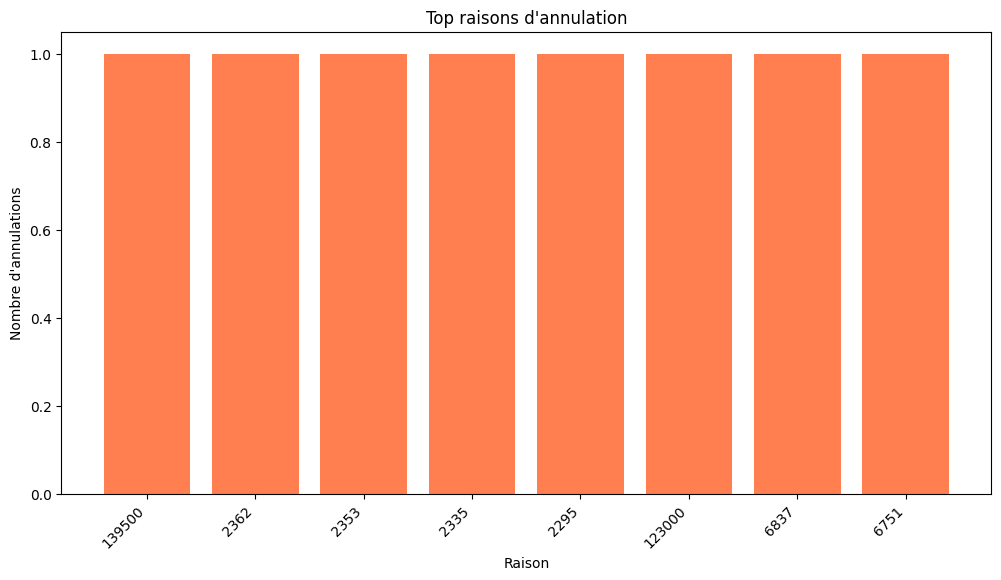

In [ ]:
cancellation_reasons = pd.concat([
    df['reason_for_cancelling_by_customer'].value_counts().head(5),
    df['driver_cancellation_reason'].value_counts().head(5)
]).value_counts().head(8)

plt.figure(figsize=(12, 6))
plt.bar(range(len(cancellation_reasons)), cancellation_reasons.values, color='coral')
plt.title('Top raisons d\'annulation')
plt.xlabel('Raison')
plt.ylabel('Nombre d\'annulations')
plt.xticks(range(len(cancellation_reasons)), cancellation_reasons.index, rotation=45, ha='right')
plt.show()

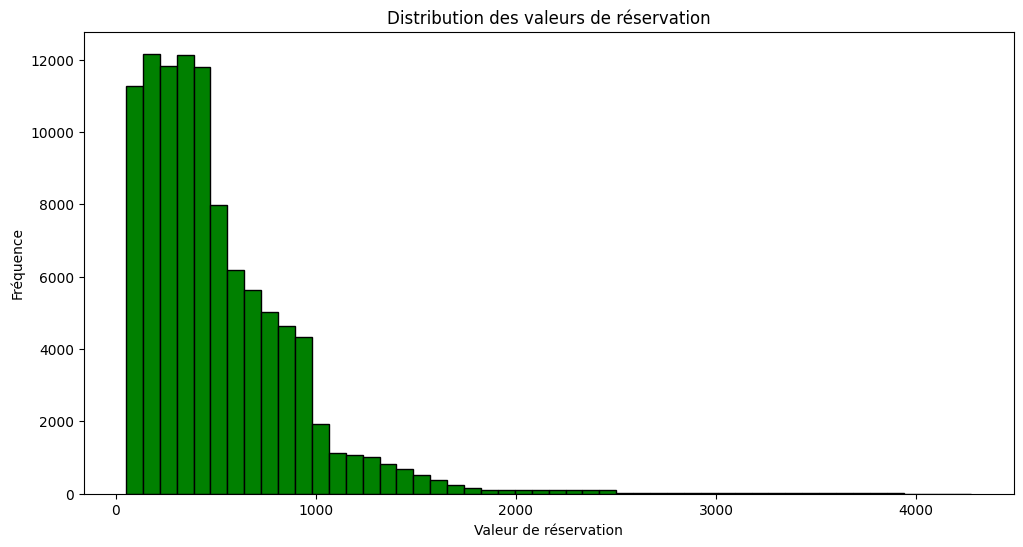

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['booking_value'], bins=50, color='green', edgecolor='black')
plt.title('Distribution des valeurs de réservation')
plt.xlabel('Valeur de réservation')
plt.ylabel('Fréquence')
plt.show()

<Figure size 1200x600 with 0 Axes>

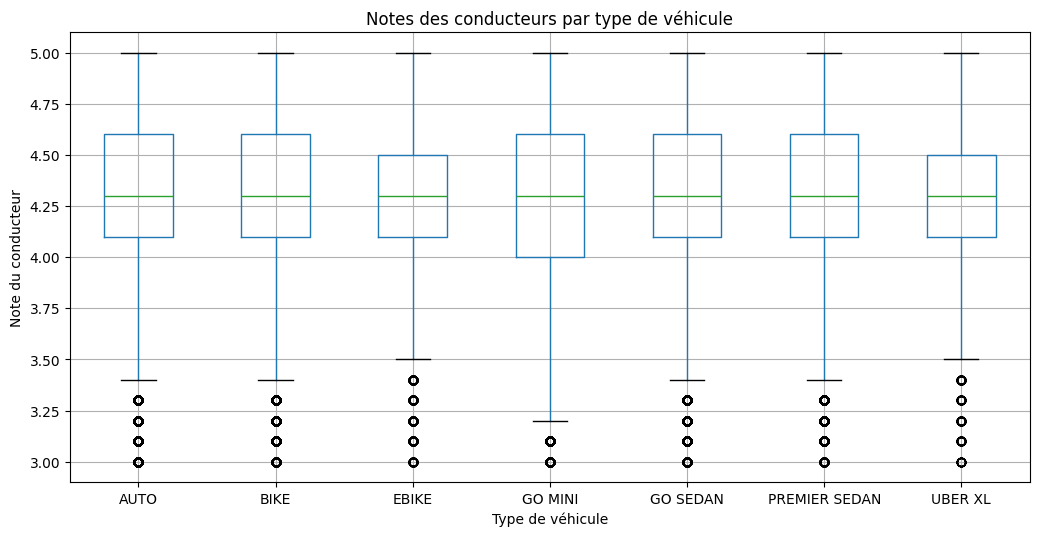

In [ ]:
plt.figure(figsize=(12, 6))
df.boxplot(column='driver_ratings', by='vehicle_type', figsize=(12, 6))
plt.title('Notes des conducteurs par type de véhicule')
plt.xlabel('Type de véhicule')
plt.ylabel('Note du conducteur')
plt.suptitle('')
plt.show()

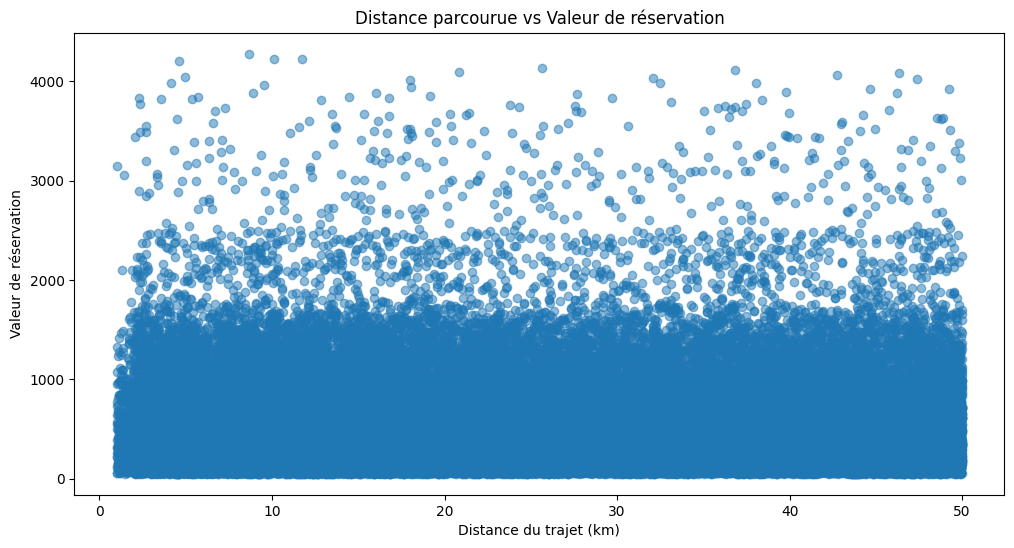

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['ride_distance'], df['booking_value'], alpha=0.5)
plt.title('Distance parcourue vs Valeur de réservation')
plt.xlabel('Distance du trajet (km)')
plt.ylabel('Valeur de réservation')
plt.show()

## Conclusion PARTIE 3

Les visualisations montrent clairement les tendances et patterns dans les données des réservations Uber. Les graphiques permettent une meilleure compréhension de la distribution des réservations par mois, type de véhicule, et raisons d'annulation. Les corrélations entre la distance et la valeur de réservation sont bien visibles.

# PARTIE 4 — Dashboard

## Architecture prévue du dashboard Dash

Le dashboard interactif sera construit avec Dash et Plotly pour fournir une vue complète des KPIs métier.

**KPIs principaux:**
- Nombre total de réservations
- Revenu total et revenu moyen
- Taux d'annulation
- Notes moyennes (conducteurs et clients)

**Filtres interactifs:**
- Filtre par date (mois, semaine)
- Filtre par type de véhicule
- Filtre par statut de réservation
- Filtre par méthode de paiement

**Pages du dashboard:**
- Accueil: Vue d'ensemble des KPIs
- Analyse: Graphiques détaillés des réservations et revenus
- Raisons d'annulation: Analyse des motifs d'annulation
- Performances: Comparaison des types de véhicules et notes

# PARTIE 5 — Recommandations

1. **Réduire le taux d'annulation**: Le taux d'annulation observé dans PARTIE 2 représente une perte de revenu significative. Implémenter des systèmes de confirmation pour diminuer ce taux.

2. **Optimiser la gestion des heures de pointe**: L'heure de pointe identifiée en PARTIE 2 concentre la majorité des réservations. Ajuster les prix et la disponibilité des conducteurs pendant cette période.

3. **Prioriser les types de véhicules rentables**: Le revenu par type de véhicule (PARTIE 2) montre des disparités claires. Augmenter la flotte des types générant le plus de revenu.

4. **Promouvoir les méthodes de paiement dominant**: La distribution des méthodes de paiement (PARTIE 2) montre des préférences clients. Optimiser la promotion des modes les plus utilisés.

5. **Améliorer la qualité du service**: Les notes moyennes des conducteurs et clients (PARTIE 2) reflètent la satisfaction. Renforcer la formation des conducteurs avec scores plus faibles.

6. **Cibler les lieux strategiques**: Les lieux de départ et destination populaires (PARTIE 2) indiquent les zones à fort potentiel. Concentrer les efforts de marketing dans ces zones.